In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 32kB/s 
     |████████████████████████████████| 3.9MB 39.4MB/s 
     |████████████████████████████████| 450kB 52.1MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt


In [4]:
(train_data, train_targets), (test_data, test_targets)= boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)
print(train_targets)

57344/57026 [==============================] - 0s 0us/step
(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 3

In [5]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
train_targets[0]

15.2

In [0]:
mean=train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [8]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
  return model

In [12]:
k=4
num_val_samples = len(train_data) // k
num_epochs=500
all_scores=[]
all_mae_histories=[]
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i*num_val_samples: (i+1) *num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1) *num_val_samples]
  partial_train_data= np.concatenate([train_data[: i*num_val_samples], train_data[(i+1)*num_val_samples:]])
  partial_train_targets= np.concatenate([train_targets[: i*num_val_samples], train_targets[(i+1)*num_val_samples:]])
  model = build_model()
  history = model.fit(partial_train_data , partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae= model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [14]:
average_mae_history = [ np.mean ([ x[i] for x in all_mae_histories]) for i in range(num_val_samples) ]

print('All Fold Validation Errors:' , all_scores)
print('Mean of All Fold Validation Errors:' , np.mean(all_scores))
print('Average Mean Absolute Errors History:' , average_mae_history)

All Fold Validation Errors: [2.5453005, 2.8733573, 2.959213, 2.5732138]
Mean of All Fold Validation Errors: 2.737771
Average Mean Absolute Errors History: [10.994309, 3.4982693, 2.990918, 2.7363198, 2.5586162, 2.4359186, 2.3873713, 2.3185787, 2.268234, 2.2306938, 2.1708918, 2.1301043, 2.1249378, 2.093101, 2.0329678, 2.0359764, 2.0368078, 1.9938526, 1.9782171, 1.968012, 1.9694216, 1.9239144, 1.9368765, 1.909633, 1.9041215, 1.8823358, 1.8585287, 1.8272221, 1.8555104, 1.8171954, 1.800061, 1.7841654, 1.7567749, 1.8126963, 1.7610133, 1.7629867, 1.7522268, 1.7381344, 1.7251288, 1.7103585, 1.697429, 1.690832, 1.6868546, 1.6458975, 1.6661043, 1.6218333, 1.6208823, 1.5966705, 1.6368836, 1.6302695, 1.5896224, 1.6028168, 1.604295, 1.5622574, 1.5735518, 1.563554, 1.5574079, 1.5779395, 1.5525013, 1.5310403, 1.5384842, 1.5224166, 1.5318639, 1.5150843, 1.5108385, 1.4688003, 1.4978597, 1.4705381, 1.4716462, 1.5001522, 1.4557272, 1.4716985, 1.4804186, 1.4220676, 1.4431492, 1.4339508, 1.4164876, 1.41119

In [15]:
[len(x) for x in all_mae_histories]

[500, 500, 500, 500]

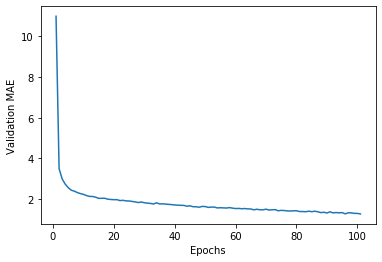

In [16]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

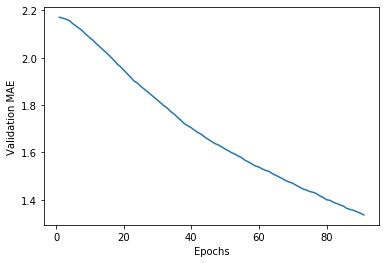

In [17]:
def smooth_curve(points, factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous=smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history= smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [20]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

102/102 [==============================] - 0s 648us/sample - loss: 19.9226 - mae: 2.9016
2.901555
